## 1. Feature space from csv file. Read `data/ds_salaries.csv` into a pandas dataframe

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
df = pd.read_csv('../data/ds_salaries.csv', delimiter=',', index_col=0)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


## 2. Prune the dataset to only have columns: "work_year", "experience_level", "salary_in_usd", "job_title", "company_location", "company_size".

In [2]:
data = df[["work_year", "experience_level", "salary_in_usd", "job_title", "company_location", "company_size"]]
data

,work_year,experience_level,salary_in_usd,job_title,company_location,company_size
0,2020,MI,79833,Data Scientist,DE,L
1,2020,SE,260000,Machine Learning Scientist,JP,S
2,2020,SE,109024,Big Data Engineer,GB,M
3,2020,MI,20000,Product Data Analyst,HN,S
4,2020,SE,150000,Machine Learning Engineer,US,L
...,...,...,...,...,...,...
602,2022,SE,154000,Data Engineer,US,M
603,2022,SE,126000,Data Engineer,US,M
604,2022,SE,129000,Data Analyst,US,M
605,2022,SE,150000,Data Analyst,US,M


## 3. Onehot encode "experience_level". Hint: look up pandas: `get_dummies()` method.

In [3]:
gd = pd.get_dummies(data, columns = ["experience_level"])
gd

,work_year,salary_in_usd,job_title,company_location,company_size,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,2020,79833,Data Scientist,DE,L,0,0,1,0
1,2020,260000,Machine Learning Scientist,JP,S,0,0,0,1
2,2020,109024,Big Data Engineer,GB,M,0,0,0,1
3,2020,20000,Product Data Analyst,HN,S,0,0,1,0
4,2020,150000,Machine Learning Engineer,US,L,0,0,0,1
...,...,...,...,...,...,...,...,...,...
602,2022,154000,Data Engineer,US,M,0,0,0,1
603,2022,126000,Data Engineer,US,M,0,0,0,1
604,2022,129000,Data Analyst,US,M,0,0,0,1
605,2022,150000,Data Analyst,US,M,0,0,0,1


In [4]:
xp_level = df.loc[1:,'experience_level']  
print(pd.get_dummies(xp_level))

     EN  EX  MI  SE
1     0   0   0   1
2     0   0   0   1
3     0   0   1   0
4     0   0   0   1
5     1   0   0   0
..   ..  ..  ..  ..
602   0   0   0   1
603   0   0   0   1
604   0   0   0   1
605   0   0   0   1
606   0   0   1   0

[606 rows x 4 columns]


## 4. labelencode "company_location" 

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# apply on df
data['company_location'] = encoder.fit_transform(data['company_location'])
data

,work_year,experience_level,salary_in_usd,job_title,company_location,company_size
0,2020,MI,79833,Data Scientist,12,L
1,2020,SE,260000,Machine Learning Scientist,29,S
2,2020,SE,109024,Big Data Engineer,18,M
3,2020,MI,20000,Product Data Analyst,20,S
4,2020,SE,150000,Machine Learning Engineer,48,L
...,...,...,...,...,...,...
602,2022,SE,154000,Data Engineer,48,M
603,2022,SE,126000,Data Engineer,48,M
604,2022,SE,129000,Data Analyst,48,M
605,2022,SE,150000,Data Analyst,48,M


## 5. Normalize the company_location number (relative value between 0-1) ![](https://cdn-images-1.medium.com/max/253/1*Dl3P3Rrzto258X0Ales9Xw.png)

In [6]:
from sklearn import preprocessing



scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(data[["company_location"]])
scaled_df = pd.DataFrame(d, columns = ["company_location"])
scaled_df

,company_location
0,0.244898
1,0.591837
2,0.367347
3,0.408163
4,0.979592
...,...
602,0.979592
603,0.979592
604,0.979592
605,0.979592


## 6. Make binning of the salary column (both cut and qcut methods).

In [84]:
#scaler = preprocessing.MinMaxScaler()
#d = scaler.fit_transform(data[["salary_in_usd"]])
#scaled_df = pd.DataFrame(d, columns = ["salary_in_usd"])
#scaled_df

In [12]:
data['salary_cut'] = pd.cut(df['salary_in_usd'], bins=5, labels=["lowest","low", "med", "high","highest"])
data['salary_qcut'] = pd.qcut(df['salary_in_usd'], q=10, precision=0)
data

,work_year,experience_level,salary_in_usd,job_title,company_location,company_size,salary_cut,salary_qcut
0,2020,MI,79833,Data Scientist,12,L,lowest,"(71338.0, 87932.0]"
1,2020,SE,260000,Machine Learning Scientist,29,S,med,"(200000.0, 600000.0]"
2,2020,SE,109024,Big Data Engineer,18,M,lowest,"(101570.0, 120000.0]"
3,2020,MI,20000,Product Data Analyst,20,S,lowest,"(2858.0, 33689.0]"
4,2020,SE,150000,Machine Learning Engineer,48,L,low,"(140000.0, 160000.0]"
...,...,...,...,...,...,...,...,...
602,2022,SE,154000,Data Engineer,48,M,low,"(140000.0, 160000.0]"
603,2022,SE,126000,Data Engineer,48,M,low,"(120000.0, 140000.0]"
604,2022,SE,129000,Data Analyst,48,M,low,"(120000.0, 140000.0]"
605,2022,SE,150000,Data Analyst,48,M,low,"(140000.0, 160000.0]"


## 7. Make a barplot with binned salaries to show the company size count for each of the bins. Like this: 

#### Hint: Use pandas Series unstack() method to get a dataframe from a multiindex Series object (The result of making a groupby count on both salary_bins and company_size columns

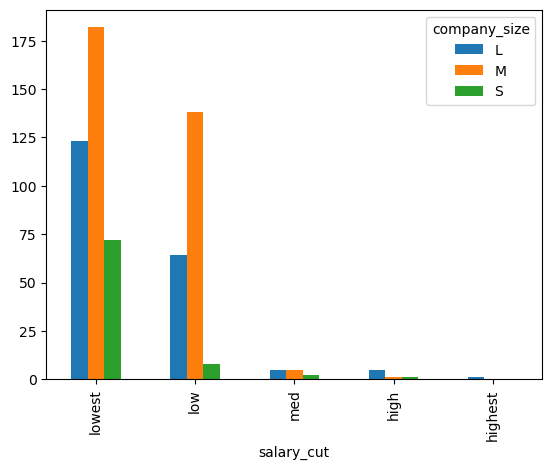

company_size    L    M   S
salary_cut                
lowest        123  182  72
low            64  138   8
med             5    5   2
high            5    1   1
highest         1    0   0


In [13]:
import matplotlib.pyplot as plt
#ex1 = data.groupby('salary_cut')['company_size'].reset_index()
#ex1
#result = data.groupby(['salary_cut','salary_qcut'])['company_size'].count()
#result = data.groupby(['company_size', 'salary_qcut', 'salary_cut']).unstack(0)
#print(result)

d = data.groupby(['salary_cut','company_size']).size()
p = d.unstack()
p.plot(kind='bar', stacked=False)
plt.show()
print(p)

## 8. Make it into a function that can take either company_size or experience_level as arguments.

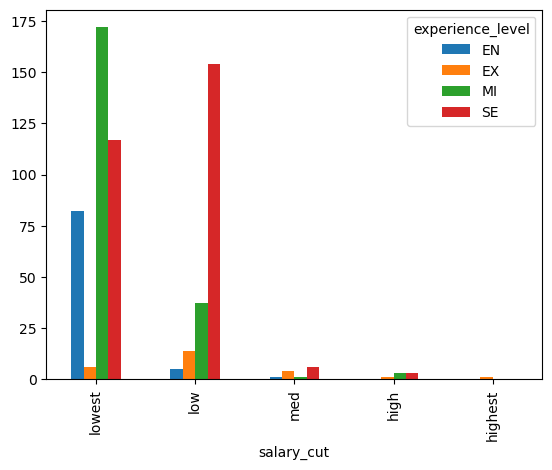

experience_level  EN  EX   MI   SE
salary_cut                        
lowest            82   6  172  117
low                5  14   37  154
med                1   4    1    6
high               0   1    3    3
highest            0   1    0    0


In [14]:
def show_salary(checkby):
    d = data.groupby(['salary_cut',checkby]).size()
    return d.unstack()

p = show_salary('experience_level')
#p = show_salary('company_size')
p.plot(kind='bar', stacked=False)
plt.show()
print(p)

## 9. Change the experience_level column to be numeric using this dictionary: `experience = {'EN':10,'EX':20,'MI':30,'SE':40}`. Hint: [Here](https://sparkbyexamples.com/pandas/pandas-remap-values-in-column-with-a-dictionary-dict/).

In [19]:
dict = {'EN':10,'EX':20,'MI':30,'SE':40}
data = data.replace({"experience_level": dict})
print(data.head())

   work_year  experience_level  salary_in_usd                   job_title  \
0       2020                30          79833              Data Scientist   
1       2020                40         260000  Machine Learning Scientist   
2       2020                40         109024           Big Data Engineer   
3       2020                30          20000        Product Data Analyst   
4       2020                40         150000   Machine Learning Engineer   

   company_location company_size salary_cut           salary_qcut  
0                12            L     lowest    (71338.0, 87932.0]  
1                29            S        med  (200000.0, 600000.0]  
2                18            M     lowest  (101570.0, 120000.0]  
3                20            S     lowest     (2858.0, 33689.0]  
4                48            L        low  (140000.0, 160000.0]  


## 10. Use seaborn pairplot to see if there is an approximately linear relationship between experience_level and salary

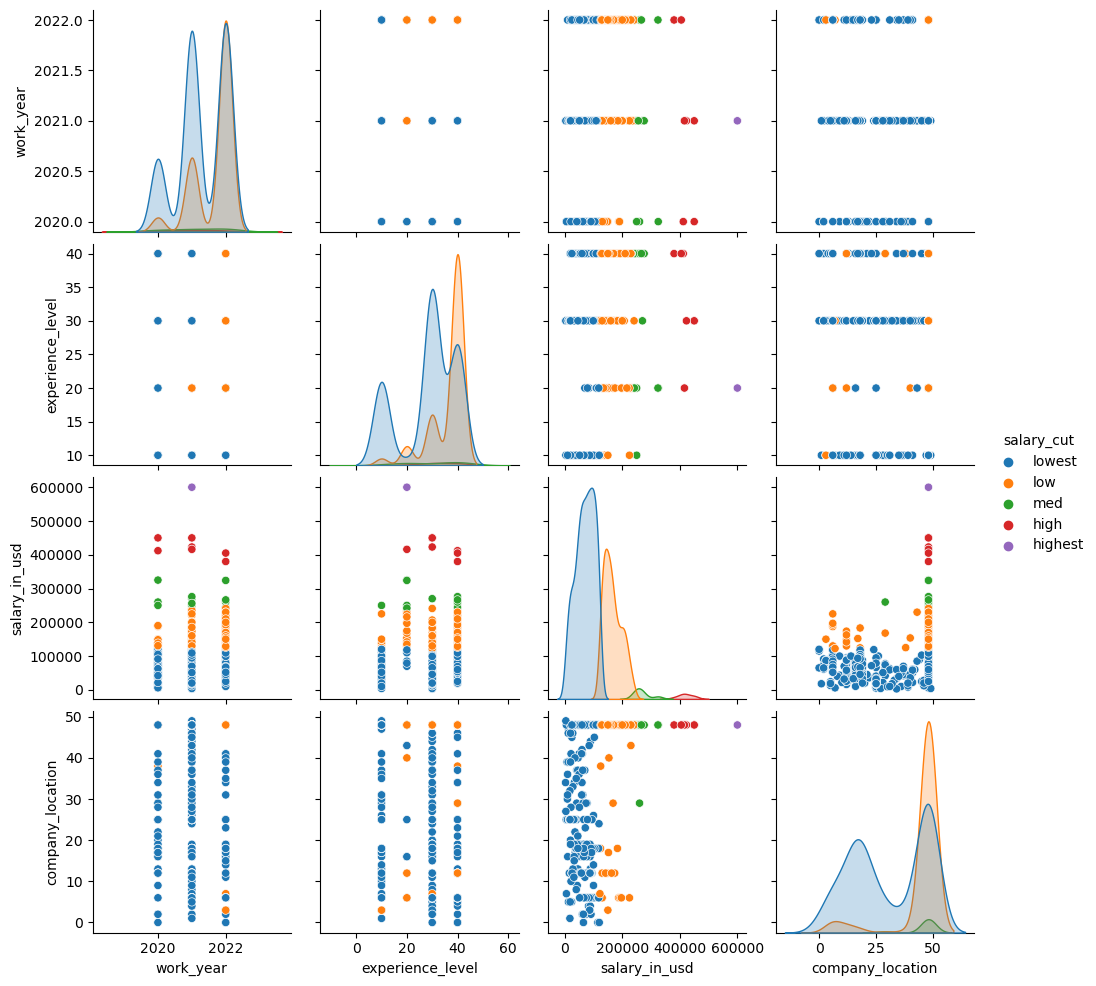

In [30]:
import seaborn as sns



sns.pairplot(data, hue="salary_cut")

## 11. scatter Plot the 2d feature space of 'experience_level' and 'salary_in_usd

<AxesSubplot: xlabel='experience_level', ylabel='salary_in_usd'>

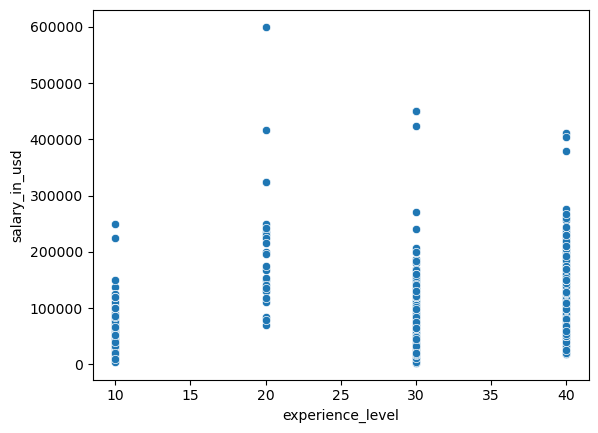

In [31]:
sns.scatterplot(data=data, x="experience_level", y="salary_in_usd")

## 12. Use sklearn to find the best possible linear relationship between experience_level and salary_in_usd using linear regression.

In [34]:
import sklearn.linear_model
import numpy as np

xs = data['experience_level']
ys = data['salary_in_usd']

In [36]:

xs_reshape = np.array(xs).reshape(-1, 1)
print(xs.shape)
print(xs_reshape.shape)
#print(xs_reshape)

(607,)
(607, 1)


In [37]:
model = sklearn.linear_model.LinearRegression()
model.fit(xs_reshape, ys)

LinearRegression()

In [38]:
model.coef_

array([2163.68675767])

In [39]:
model.intercept_

44606.91181525566

In [54]:
predicted = model.predict(xs_reshape)
xp_level = 40
experience = model.predict([[xp_level]])
print('Experience (level {}) means ${} salary can be expected'.format(xp_level,'{0:.2f}'.format(experience[0])))
#predicted

#experience table 'Entry':10,'Experienced':20,'Mid?':30,'Senior':40

Experience (level 40) means $131154.38 salary can be expected


## Part 3: Linear Algebra
Given the below dictionarys find out where each of the 4 people find the cheapest shopping according to their needs.
```python
shoppers = {
'Paula':{'Is':4,'Juice':2,'Kakao':3,'Lagkager':2},
'Peter':{'Is':2,'Juice':5,'Kakao':0, 'Lagkager':4},
'Pandora':{'Is':5,'Juice':3, 'Kakao':4, 'Lagkager':5},
'Pietro':{'Is':1,'Juice':8, 'Kakao':9, 'Lagkager':1}
}
shop_prices = {
    'Netto': {'Is':10.50,'Juice':2.25,'Kakao':4.50,'Lagkager':33.50},
    'Fakta': {'Is':4.00,'Juice':4.50,'Kakao':6.25,'Lagkager':20.00}
}
```
Hint: you can use pandas and Transpose to create dataframe: `pd.DataFrame(shoppers).T` to get the necessary shape of the dataframe/matrix. Also use df.to_numpy() to changes a Pandas DataFrame df into a numpy ndarray with only the numeric data


In [55]:
shoppers = {
'Paula':{'Is':4,'Juice':2,'Kakao':3,'Lagkager':2},
'Peter':{'Is':2,'Juice':5,'Kakao':0, 'Lagkager':4},
'Pandora':{'Is':5,'Juice':3, 'Kakao':4, 'Lagkager':5},
'Pietro':{'Is':1,'Juice':8, 'Kakao':9, 'Lagkager':1}
}
shop_prices = {
    'Netto': {'Is':10.50,'Juice':2.25,'Kakao':4.50,'Lagkager':33.50},
    'Fakta': {'Is':4.00,'Juice':4.50,'Kakao':6.25,'Lagkager':20.00}
}

#### First we make it into Panda dataframes

In [94]:
shoppers = pd.DataFrame(shoppers).T
prices = pd.DataFrame(shop_prices)

shoppers

,Is,Juice,Kakao,Lagkager
Paula,4,2,3,2
Peter,2,5,0,4
Pandora,5,3,4,5
Pietro,1,8,9,1


In [95]:
prices

,Netto,Fakta
Is,10.50,4.00
Juice,2.25,4.50
Kakao,4.50,6.25
Lagkager,33.50,20.00


#### Then we convert it to Numpy

In [68]:
P = shoppers.to_numpy()
Q = prices.to_numpy()

#### Then we find the dot product of the two vectors

In [69]:
R = P.dot(Q)
R

array([[127.  ,  83.75],
       [166.25, 110.5 ],
       [244.75, 158.5 ],
       [102.5 , 116.25]])

#### Then we convert it back to a dataframe, to make it more readable with correct index and column names

In [91]:
#pd.DataFrame(R, columns = ['Netto','Fakta'], index = ['Paula', 'Peter', 'Pandora', 'Pietro'])
pd.DataFrame(R, columns = prices.columns, index = shoppers.index)

,Netto,Fakta
Paula,127.00,83.75
Peter,166.25,110.50
Pandora,244.75,158.50
Pietro,102.50,116.25
